# Taller 4
Este taller consta de un punto, en el cual esperamos pongan en práctica los conceptos abordados en las clases hasta la fecha.

NOTA: El archivo .pynb entregado debe tener todas las celdas ejecutadas, con los resultados visibles. El nombre del archivo debe ser NombreCompleto_Taller4.ipynb

In [23]:
# Librerias
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


## Parte 1: Titanic
Para este ejercicio usaremos el dataset del titanic con el fin de predecir si una persona sobrevive o no al hundimiento del barco.
Requerimientos básicos del ejercicio: 
* Análisis exploratorio básico de los datos (ver nulos, balance de clases, etc. )
* Análisis estadístico básico de los datos
* Comparación de dos algoritmos de machine learning(uno de ellos será Naive bayes) como mínimo, usando cross validation, seleccionar el mejor, las métricas usadas para la selección quedan a su criterio.
* Si el modelo tiene regularización, aplicar por lo menos dos técnicas de regularización y seleccionar la mejor.
* Usar PCA tomando datos con el 95% de la varianza y con el 80% de la varianza
* Implementar las métricas vistas en clase para comparar resultados.

**NOTA: Es IMPORTANTE justificar cada una de las desiciones que se vayan tomando a lo largo del desarrollo del ejercicio** 

## 1. Análisis exploratorio básico de datos

### 1.1 Diccionario de datos y datos básicos

In [3]:
# Importar Dataset a Utilizar

titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [12]:
# Información básica del dataset
titanic.shape

(891, 15)

In [32]:
# Columnas del dataset
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

El diccionario de datos se encuentra disponible en el siguiente link: https://www.kaggle.com/code/datalana/titanic-working-with-data-dictionary/data


Donde:
* survived	Survival	0 = No, 1 = Yes
* pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
* sex	Sex	
* age	Age in years	
* sibsp	# of siblings / spouses aboard the Titanic	
* parch	# of parents / children aboard the Titanic	
* fare	Passenger fare	
* embarked	Port of Embarkation
* class Ticket class
* who Gender of the passenger
* adult_male Logic built over the sex and age column
* deck
* embark_town	Name of the town where passanger embarked
* alive	Boolean as survived
* alone Logic built over the sibsp and parch columns

Se nota que las columnas contienen la misma información:
* embark_town-embarked
* survived-alive
* sex-who
* pclass-class

Se nota además que las siguientes columnas son derivadas con lógica de otras columnas del dataset:
* alone --> sibsp-parch
* adult_male --> sex-age

Además de que todas las variables son categóricas salvo, age y fare



In [13]:
# Resumen del Dataset Titanic
print(titanic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None


In [10]:
# Conteo de valores nulos dentro del dataset por variable
titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [36]:
# Número de duplicados del dataset
print("Al no tener una llave primaria como por ejemplo un pasajeroID no es posible determinar si realmente se trata de valores duplicados o simplemente es coincidencia que la información de dos o más pasajeros sea exactamente igual")
titanic.duplicated().sum()

Al no tener una llave primaria como por ejemplo un pasajeroID no es posible determinar si realmente se trata de valores duplicados o simplemente es coincidencia que la información de dos o más pasajeros sea exactamente igual


107

### 1.2 Análisis univariable

Para este paso, hay que tener en cuenta que la mayoría de variables son categóricas, por lo que la manera como se aborda este análisis se debe ajustar a estas condiciones.

0    0.616162
1    0.383838
Name: survived, dtype: float64
AxesSubplot(0.125,0.11;0.775x0.77)
El dataset no puede ser categorizado como particularmente desbalanceado, una relación de aproximadamente 60 vs 40 por ciento no es un mal indicador inicial.


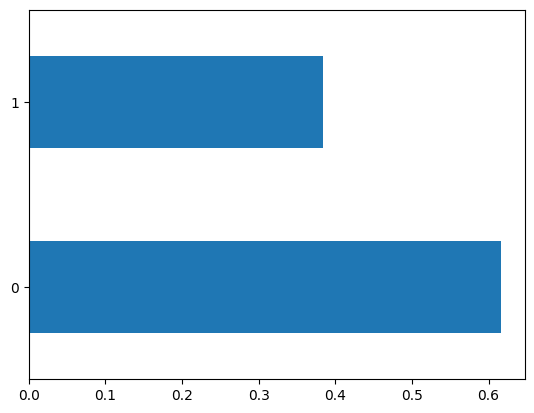

In [42]:
# Porcentaje de cada categoria de la variable "survived"
print(titanic.survived.value_counts(normalize=True))

# Gráfica del porcentaje
print(titanic.survived.value_counts(normalize=True).plot.barh())

print("El dataset no puede ser categorizado como particularmente desbalanceado, una relación de aproximadamente 60 vs 40 por ciento no es un mal indicador inicial.")
plt.show()

3    0.551066
1    0.242424
2    0.206510
Name: pclass, dtype: float64
AxesSubplot(0.125,0.11;0.775x0.77)
Se evidencia que más de la mitad de los pasajeros viajaron en tercera clase


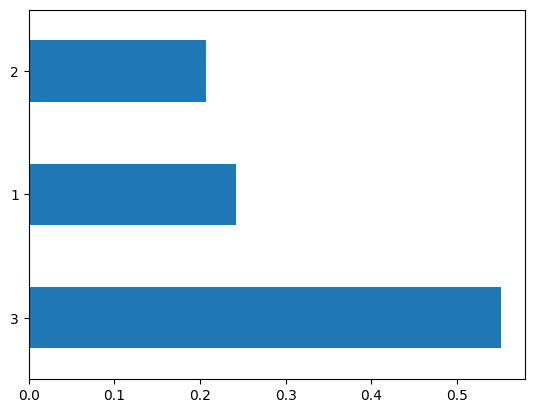

In [46]:
# Porcentaje de cada categoria de la variable "pclass"
print(titanic.pclass.value_counts(normalize=True))

# Gráfica del porcentaje
print(titanic.pclass.value_counts(normalize=True).plot.barh())

print("Se evidencia que más de la mitad de los pasajeros viajaron en tercera clase")
plt.show()

male      0.647587
female    0.352413
Name: sex, dtype: float64
AxesSubplot(0.125,0.11;0.775x0.77)
Se evidencia que habían más hombres que mujeres abordo del Titanic


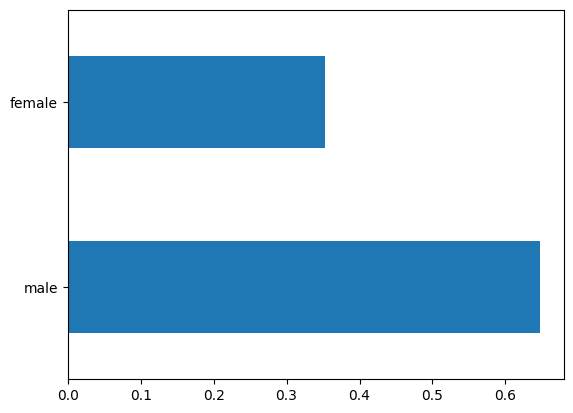

In [49]:
# Porcentaje de cada categoria de la variable "pclass"
print(titanic.sex.value_counts(normalize=True))

# Gráfica del porcentaje
print(titanic.sex.value_counts(normalize=True).plot.barh())

print("Se evidencia que habían más hombres que mujeres abordo del Titanic")
plt.show()

Si se trata de realizar una análisis multivariable se evidencia fácilmente como cada observación se aloja en un ppun realiza 


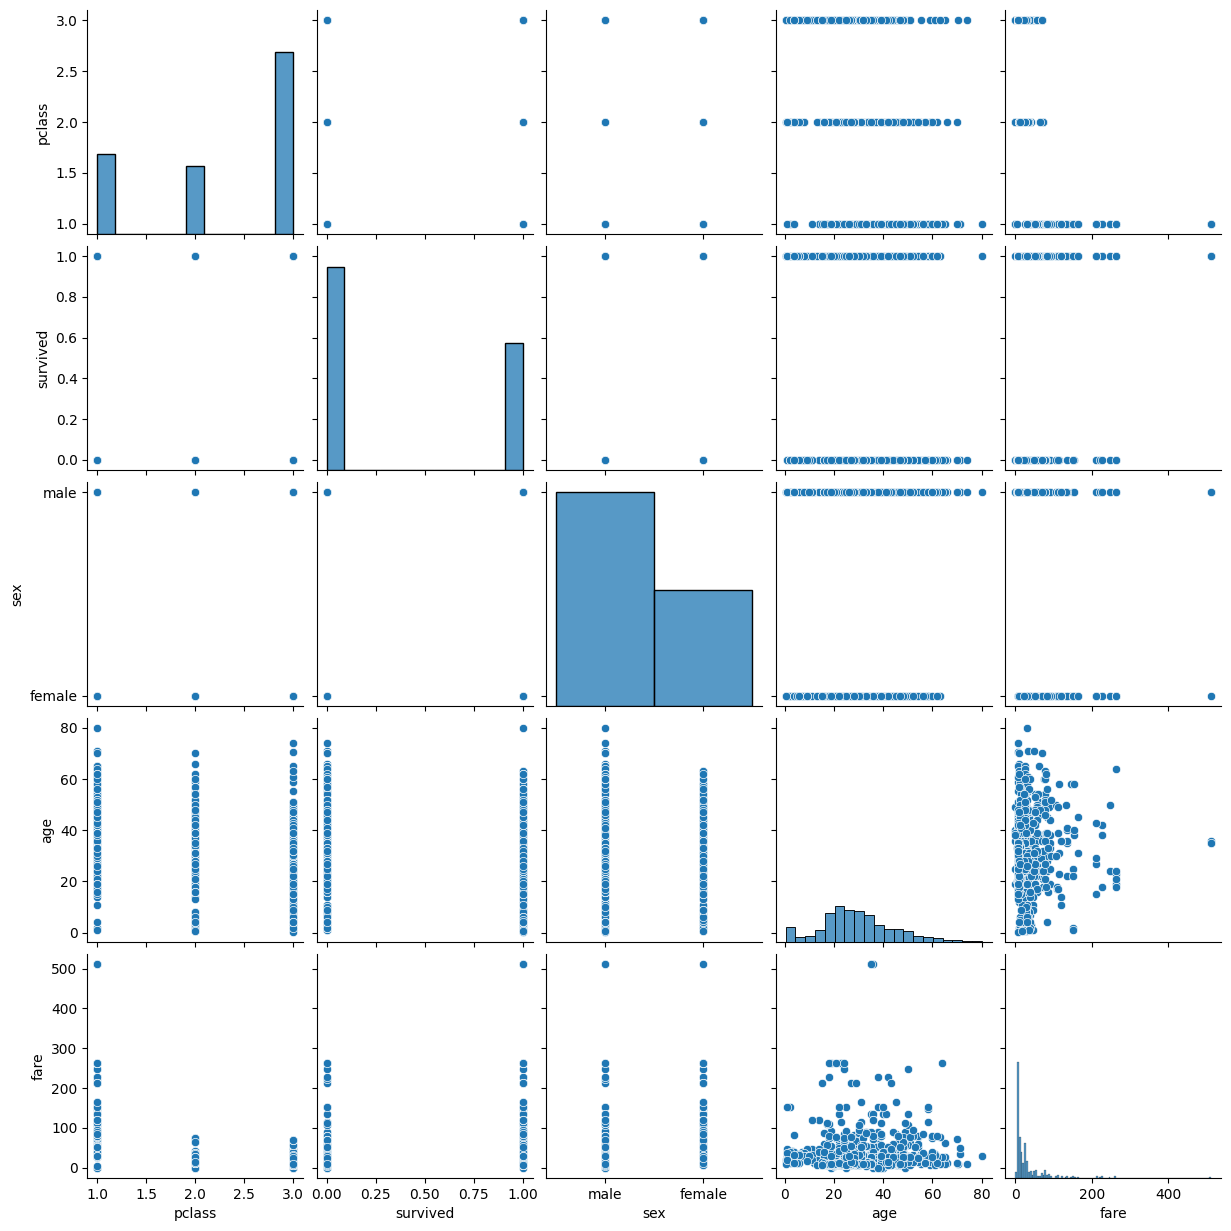

In [44]:
print("Si se trata de realizar una análisis multivariable se evidencia fácilmente como cada observación se aloja en un ppun realiza ")
sns.pairplot(data = titanic, vars=['pclass','survived','sex', 'age'])
plt.show()

sns.pairplot(data = titanic, vars=['pclass','survived','sex', 'age', 'fare'])
plt.show()

/opt/homebrew/Caskroom/miniforge/base/envs/env_machineLearning/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


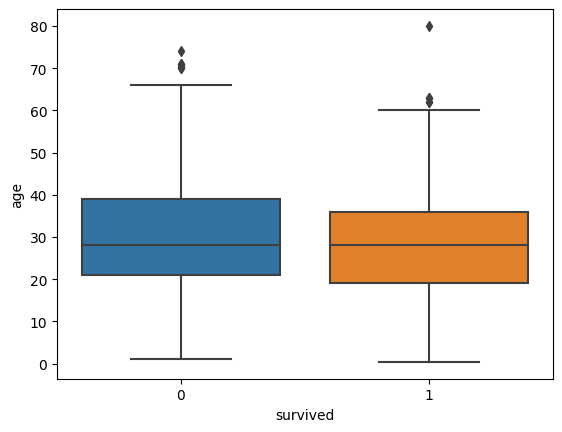

In [29]:
sns.boxplot(titanic.survived, titanic.age)
plt.show()

/opt/homebrew/Caskroom/miniforge/base/envs/env_machineLearning/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


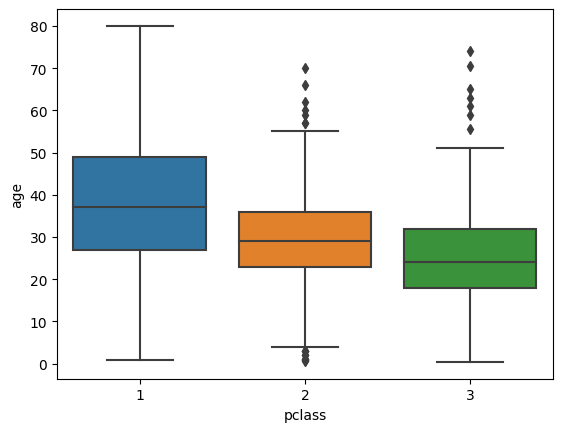

In [31]:
sns.boxplot(titanic.pclass, titanic.age)
plt.show()

sex       female      male
pclass                    
1       0.968085  0.368852
2       0.921053  0.157407
3       0.500000  0.135447


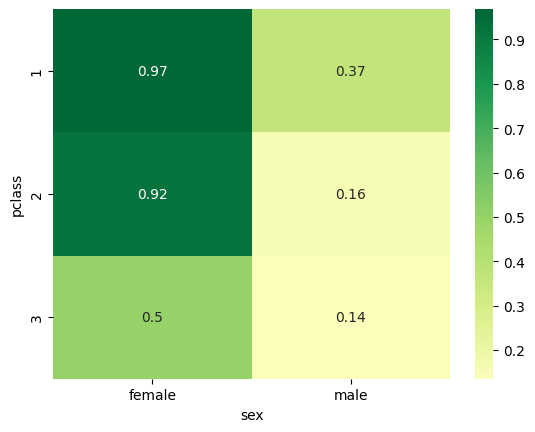

In [30]:
result = pd.pivot_table(data=titanic, index='pclass', columns='sex',values='survived')
print(result)

#create heat map of education vs marital vs response_rate
sns.heatmap(result, annot=True, cmap = 'RdYlGn', center=0.117)
plt.show()

In [34]:
titanic.to_csv("Example.csv")